<a href="https://colab.research.google.com/github/jamesWagstaff1985/AssignmentFive/blob/master/simple_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import tensorflow, keras, numpy and matplotlib

In [0]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import Dropout

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Define some data to play around with, this is going to be a simple sum of a and b, so two inputs, for every output. Simples!

In [0]:
inputData = np.array([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14],[15,16],[17,18],[19,20],
                      [5,5],[10,10],[20,20],[30,30],[40,40],[50,50],[60,60],[70,70],[80,80],[90,90],[100,100],
                      [3,12],[99,172],[25,34],[34.5,12.7],[12.99,10.01],[98,7.3],[5.2,5.2],[7.9,5.0]])

In [0]:
outputData = np.array([[3],[7],[11],[15],[19],[23],[27],[31],[35],[39],
                       [10],[20],[40],[60],[80],[100],[120],[140],[160],[180],[200],
                       [15],[281],[59],[47.2],[23],[105.3],[10.4],[12.9]])

Let's build a model with lots of layers!! And some dropout layers, we don't want the machine to learn the answers.

In [0]:
def build_model():
  model = keras.Sequential()
  model.add(layers.Dense(512, activation=tf.nn.relu, input_shape=[2]))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(256, activation=tf.nn.relu))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(128, activation=tf.nn.relu))
  model.add(layers.Dense(64, activation=tf.nn.relu))
  model.add(layers.Dense(32, activation=tf.nn.relu))
  model.add(layers.Dense(16, activation=tf.nn.relu))
  model.add(layers.Dense(8, activation=tf.nn.relu))
  model.add(layers.Dense(1))
  
  return model

Build the model and print out a summary

In [0]:
model = build_model()
model.build()
model.summary()

Now we need to define an optimizer function for compiling the model.
For the loss function we will use the standard mean squared error and in the metrics we will use mean squared error along with mean absolute error.

In [0]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0015)


model.compile(loss='mse', 
               optimizer=optimizer,
               metrics=['mae', 'mse'])

Lets train the model 400 times, and use 30% for validation

In [0]:
EPOCHS = 400

history = model.fit(
  inputData, outputData, 
  epochs=EPOCHS, validation_split = 0.3, verbose=0)

Now let's plot out the training summary

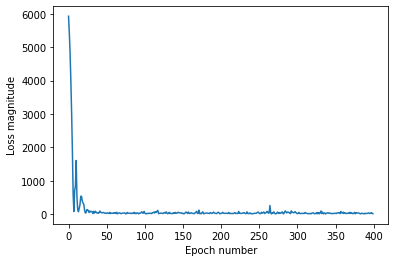

In [0]:
plt.xlabel('Epoch number')
plt.ylabel('Loss magnitude')
plt.plot(history.history['loss'])

And print out some tests to see how well we perform

In [0]:
print(model.predict([[10, 20]]))
print(model.predict([[30, 20]]))
print(model.predict([[25, 17]]))

[[30.380348]]
[[50.478645]]
[[42.46579]]


Now we can save our trained model as either h5 for use with python and if we like, later convert it directly to a format to be used in tensorflowjs.

In [0]:
from google.colab import files

save the model, zip and download

In [0]:
model.save('model.h5')
!zip model_h5.zip model.h5
files.download('model_h5.zip')

updating: model.h5 (deflated 31%)


JS, To convert for tensorflowjs, install and import tensorflowjs

In [0]:
!pip install tensorflowjs 
import tensorflowjs as tfjs

Now we need to create a directory for the tensorflowjs files to go in, this will be a binary file and a json file

In [0]:
!mkdir model
!tensorflowjs_converter --input_format keras model.h5 model/

mkdir: cannot create directory ‘model’: File exists


Finally, zip and download. For an example of implementing the model with tensorflowjs, see the github demo at -------

In [0]:
!zip -r model.zip model 
files.download('model.zip')

updating: model/ (stored 0%)
updating: model/model.json (deflated 86%)
updating: model/group1-shard1of1.bin (deflated 8%)
